In [1]:
import numpy as np
import pandas as pd
import random
import bingo

In [2]:
%matplotlib inline

# Simulate One Game

In [3]:
random.seed(6521)

In [4]:
obj_card = bingo.bingo_card()
obj_draws = bingo.bingo_number_draw()
print('Starting Card:\n',obj_card,'\n',sep='')
obj_card.markup_card_vector_draws(vec_numbers_drawn=obj_draws.get_all_values_drawn(),is_print=True)
print('\nNumbers Drawn (in order): ',', '.join(str(x) for x in obj_draws.get_all_values_drawn()))
print('\nCompleted Card:\n',obj_card,sep='')

Starting Card:
B	8	3	12	9	11
I	17	21	20	29	22
N	38	32	X	42	40
G	54	58	50	46	55
O	61	68	74	69	70

WON After 39 Draws

Numbers Drawn (in order):  61, 35, 56, 66, 75, 40, 24, 2, 4, 6, 52, 70, 23, 16, 9, 45, 69, 68, 8, 63, 51, 26, 55, 29, 73, 46, 60, 58, 62, 54, 43, 38, 13, 67, 34, 72, 36, 44, 50, 11, 71, 19, 42, 27, 22, 49, 33, 53, 47, 18, 39, 12, 15, 7, 3, 21, 10, 65, 41, 59, 20, 64, 28, 57, 37, 14, 5, 1, 74, 48, 17, 31, 25, 32, 30

Completed Card:
B	X	3	12	X	11
I	17	21	20	X	22
N	X	32	X	42	X
G	X	X	X	X	X
O	X	X	74	X	X


# Simulate Manual Play
This approach would be used when you are playing a game and a real person is drawing number you want to check against your computer derived card, or cards.

In [5]:
obj_card.get_new_card()
print('Starting Card:\n',obj_card,sep='')

Starting Card:
B	1	2	13	11	9
I	21	29	23	22	18
N	41	33	X	36	35
G	47	55	53	50	52
O	69	63	70	61	73


In [6]:
vec_numbers = [57,11,56,54,36,41,1,15,17,29,48,47,6,73,14,\
               52,3,55,5,71,62,4,61,2,31,63,75,74,66,51,28,58,38,69,25,24,43]
for i in vec_numbers:
    obj_card.markup_card(i)
    if(obj_card.check_win()):
        print('WON')
        break
print('\nNumbers Drawn (in order): ',', '.join(str(x) for x in vec_numbers))
print('\nCompleted Card:\n',obj_card,sep='')


Numbers Drawn (in order):  57, 11, 56, 54, 36, 41, 1, 15, 17, 29, 48, 47, 6, 73, 14, 52, 3, 55, 5, 71, 62, 4, 61, 2, 31, 63, 75, 74, 66, 51, 28, 58, 38, 69, 25, 24, 43

Completed Card:
B	X	X	13	X	9
I	21	X	23	22	18
N	X	33	X	X	35
G	X	X	53	50	X
O	X	X	70	X	X


In [7]:
obj_card.reset_card_to_start()

In [8]:
obj_card.original_card

{'B': [1, 2, 13, 11, 9],
 'I': [21, 29, 23, 22, 18],
 'N': [41, 33, 'X', 36, 35],
 'G': [47, 55, 53, 50, 52],
 'O': [69, 63, 70, 61, 73]}

In [9]:
obj_card.card

{'B': [1, 2, 13, 11, 9],
 'I': [21, 29, 23, 22, 18],
 'N': [41, 33, 'X', 36, 35],
 'G': [47, 55, 53, 50, 52],
 'O': [69, 63, 70, 61, 73]}

In [10]:
vec_numbers = [57,11,56,54,36,41,1,15,17,29,48,47,6,73,14,\
               52,3,55,5,71,62,4,61,2,31,63,75,74,66,51,28,58,38,69,25,24,43]
for i in vec_numbers:
    obj_card.markup_card(i)
    if(obj_card.check_win()):
        print('WON')
        break
print('\nNumbers Drawn (in order): ',', '.join(str(x) for x in vec_numbers))
print('\nCompleted Card:\n',obj_card,sep='')


Numbers Drawn (in order):  57, 11, 56, 54, 36, 41, 1, 15, 17, 29, 48, 47, 6, 73, 14, 52, 3, 55, 5, 71, 62, 4, 61, 2, 31, 63, 75, 74, 66, 51, 28, 58, 38, 69, 25, 24, 43

Completed Card:
B	X	X	13	X	9
I	21	X	23	22	18
N	X	33	X	X	35
G	X	X	53	50	X
O	X	X	70	X	X


In [11]:
obj_card.original_card

{'B': [1, 2, 13, 11, 9],
 'I': [21, 29, 23, 22, 18],
 'N': [41, 33, 'X', 36, 35],
 'G': [47, 55, 53, 50, 52],
 'O': [69, 63, 70, 61, 73]}

In [12]:
obj_card.card

{'B': ['X', 'X', 13, 'X', 9],
 'I': [21, 'X', 23, 22, 18],
 'N': ['X', 33, 'X', 'X', 35],
 'G': ['X', 'X', 53, 50, 'X'],
 'O': ['X', 'X', 70, 'X', 'X']}

# Experiment
# Experiment: Five Players
The goal here is to evaluate how many draws it would take on a relatively large scale to have at least one winning card.  This experiment was setup to run 10,000 iterations of a BINGO game using 5 BINGO cards.  A random seed is set, so that this experiment can be repeated.

Assumptions:
- Five random BINGO cards are being played, each card is 5x5 and complies with the standard BINGO card setup.
- The cards are only reset, they are never regenerated as new.  As such, the numbers are not "new" on the cards, but any markings on the cards are removed.
- The draw lists start new each cycle; so after a card or cards are declared a winner, a random, new set of draws is obtained.

In [13]:
random.seed(91003)

In [14]:
%%time
num_cards = 5
tmp_vec_wins = []
vec_number_draws_to_win = []
vec_index_winning_card = []
vec_iteration = []
vec_obj_card = [bingo.bingo_card() for i in range(0,num_cards)]
for i in range(0,10000):
    tmp_vec_wins = []
    obj_draws = bingo.bingo_number_draw()
    vec_values_drawn = obj_draws.get_all_values_drawn()
    for j,card_current in enumerate(vec_obj_card):
        card_current.markup_card_vector_draws(vec_numbers_drawn=vec_values_drawn)
        tmp_vec_wins.append(card_current.get_number_of_markups())
        card_current.reset_card_to_start()
    vec_index_winning_card.append(np.argmin(tmp_vec_wins))
    vec_number_draws_to_win.append(min(tmp_vec_wins))
    vec_iteration.append(i)

CPU times: user 34.6 s, sys: 379 ms, total: 35 s
Wall time: 38.8 s


Minimum Number of Draws to Declare a Winner = 4
Mean Number of Draws to Declare a Winner = 29.7216
Maximum Number of Draws to Declare a Winner = 55


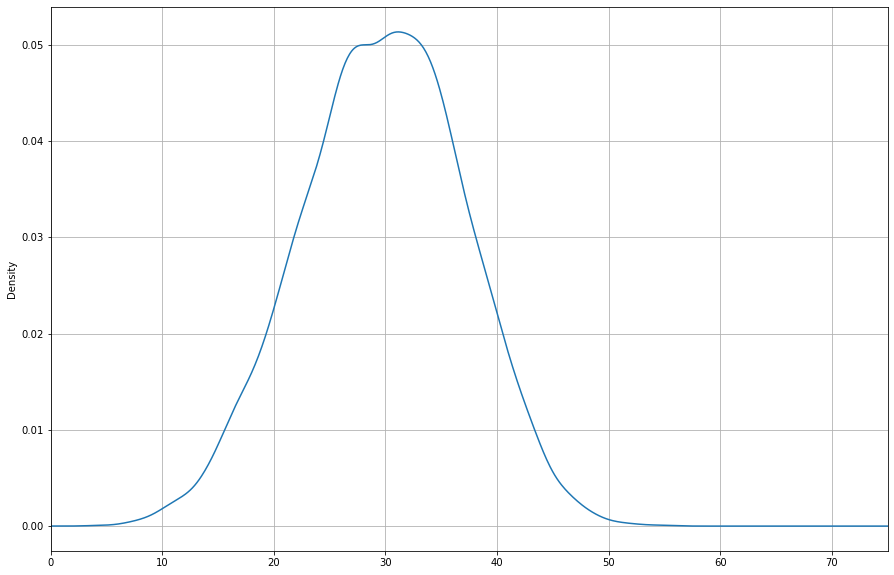

In [15]:
df_games = pd.DataFrame({'Iteration':vec_iteration,'Wining_Card':vec_index_winning_card,'Draws_to_Win':vec_number_draws_to_win})
print('Minimum Number of Draws to Declare a Winner =',df_games['Draws_to_Win'].min())
print('Mean Number of Draws to Declare a Winner =',df_games['Draws_to_Win'].mean())
print('Maximum Number of Draws to Declare a Winner =',df_games['Draws_to_Win'].max())
df_games['Draws_to_Win'].plot.kde(figsize=(15,10),xlim=(0,75),grid=True)

In [16]:
df_games['Wining_Card'].value_counts()

0    2175
1    2055
3    1969
4    1916
2    1885
Name: Wining_Card, dtype: int64

# Experiment: One Player

In [17]:
random.seed(91003)

In [18]:
%%time
num_cards = 1
tmp_vec_wins = []
vec_number_draws_to_win = []
vec_index_winning_card = []
vec_iteration = []
vec_obj_card = [bingo.bingo_card() for i in range(0,num_cards)]
for i in range(0,10000):
    tmp_vec_wins = []
    obj_draws = bingo.bingo_number_draw()
    vec_values_drawn = obj_draws.get_all_values_drawn()
    for j,card_current in enumerate(vec_obj_card):
        card_current.markup_card_vector_draws(vec_numbers_drawn=vec_values_drawn)
        tmp_vec_wins.append(card_current.get_number_of_markups())
        card_current.reset_card_to_start()
    vec_index_winning_card.append(np.argmin(tmp_vec_wins))
    vec_number_draws_to_win.append(min(tmp_vec_wins))
    vec_iteration.append(i)

CPU times: user 8.39 s, sys: 113 ms, total: 8.5 s
Wall time: 9.15 s


Minimum Number of Draws to Declare a Winner = 8
Mean Number of Draws to Declare a Winner = 41.3591
Maximum Number of Draws to Declare a Winner = 68


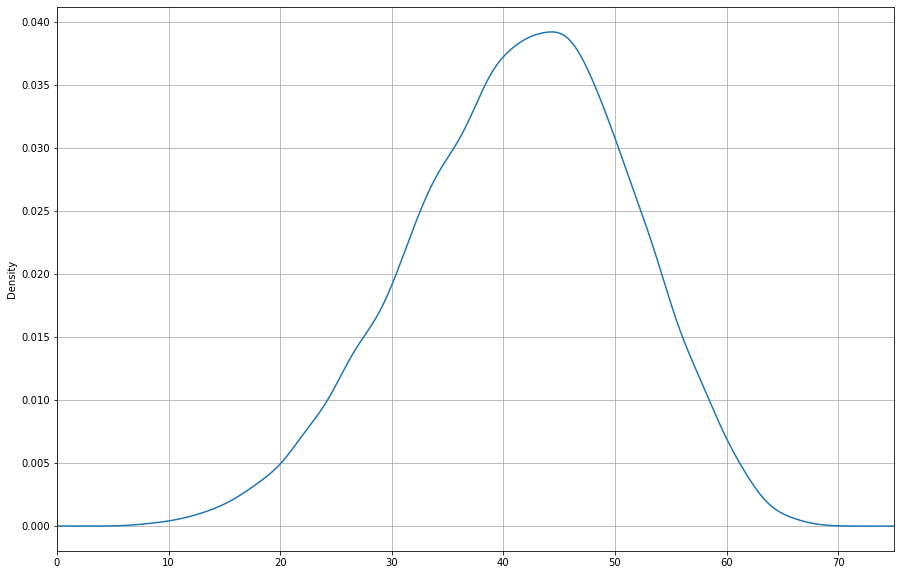

In [19]:
df_games = pd.DataFrame({'Iteration':vec_iteration,'Wining_Card':vec_index_winning_card,'Draws_to_Win':vec_number_draws_to_win})
print('Minimum Number of Draws to Declare a Winner =',df_games['Draws_to_Win'].min())
print('Mean Number of Draws to Declare a Winner =',df_games['Draws_to_Win'].mean())
print('Maximum Number of Draws to Declare a Winner =',df_games['Draws_to_Win'].max())
df_games['Draws_to_Win'].plot.kde(figsize=(15,10),xlim=(0,75),grid=True)

In [20]:
df_games['Wining_Card'].value_counts()

0    10000
Name: Wining_Card, dtype: int64